## using that site 

In [118]:
url = 'https://www.express.co.uk/sport/football/1841796/Liverpool-Luis-Suarez-retirement-Gremio-football-news'

## Getting the data from the site above

In [119]:
import requests


text = requests.get(url).content.decode('utf-8')
#make a request to access a specific URL, content retrieves the content of the HTTP request
#decode("utf-8") converts the content from bytes to a string using the UTF-8 encoding
print(text[:1000])

<!doctype html><html lang="en" class="non-js"><head><meta charset="utf-8"><meta name="viewport" content="width=device-width, initial-scale=1"><meta property="og:image" content="https://cdn.images.express.co.uk/img/dynamic/67/1200x712/5097897.jpg"><meta property="og:image:secure_url" content="https://cdn.images.express.co.uk/img/dynamic/67/1200x712/5097897.jpg"><meta property="og:image:width" content="1200"><meta property="og:image:height" content="712"><meta property="og:image:type" content="image/jpeg"><meta property="fb:pages" content="129617873765147"><meta property="og:title" content="Liverpool icon Luis Suarez hints at retirement in sad fitness update"><meta property="og:type" content="article"><meta property="og:url" content="https://www.express.co.uk/sport/football/1841796/Liverpool-Luis-Suarez-retirement-Gremio-football-news"><meta property="og:site_name" content="Express.co.uk"><meta property="og:language" content="en"><meta name="news_keywords" content="ctp_video,autoplay_vid

## Transforming the data into a suitable form
corventing from HTML source to plain text

In [120]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True 
        #checks if it is inside a start tag <script> or <style> if yes it returns true
            
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
        #if the parser encounters an end tag </script> or </style> If so, it sets the self.script flag to False.
        
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')
#checks if the data between the tags is empty or if the parser is currently in a tag
# if false it appends the data to "self.res" after removing the "[edit]" string
parser = MyHTMLParser()
#creates an instance of the 'MyHTMLParser' class called "parser"
parser.feed(text)
#feeds the html content stored in the variable 'text' into the parser for processing
text = parser.res
# the extracted text content is stored in the variable parser.res.
print(text[:100000])
#This line prints the first 1000 characters of the extracted text content.

 Liverpool icon hints at retirement after becoming free agent | Football | Sport | Express.co.uk Express. Home of the Daily and Sunday Express. Discount codes Puzzles Horoscopes Express Rated Shop Paper Newsletters Login Register Your Account Newsletters  Bookmarks Sign Out Uk Us 6 °C  Find us on Facebook Follow us on Twitter Find us on Instagram Find us on Snapchat Find us on Youtube Search HOME News Politics Royal Showbiz & TV Sport Comment Finance Travel Life & Style  Football   Tennis   Transfer news   F1   Boxing   UFC   Cricket   Rugby   Other   Golf   NFL   Racing   NBA  Home Sport Football Premier League Championship Scottish Premiership European Teams Liverpool icon hints at retirement in sad fitness update after becoming free agent One of Liverpool's most significant strikers of modern times could be about to call time on his football career.  By  Richard Garnett 10:12, Mon, Dec 4, 2023 Link copied Bookmark Jurgen Klopp astonished by four incredible Liverpool goals Luis Suare

In [121]:
import sys
!{sys.executable} -m pip install nlp_rake
#This code snippet utilizes the sys module in Python to interact with the system and the command-line interface (!) to execute a pip installation command within a Jupyter Notebook

'c:\Program' is not recognized as an internal or external command,
operable program or batch file.


In [122]:
import nlp_rake
#Rapid Automatic Keyword Extraction
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
#max_words=2: Specifies the maximum number of words allowed in a keyword/keyphrase.
#min_freq=3: Sets the minimum frequency a word should appear to be considered as a keyword.
#min_chars=5: Sets the minimum number of characters a word should have to be considered as a keyword.

res = extractor.apply(text)
#This line applies the RAKE algorithm to the provided text variable.
res
#This likely contains the result of the keyword extraction process


[('suarez', 1.4285714285714286),
 ('liverpool', 1.2),
 ('retirement', 1.0),
 ('enjoy', 1.0),
 ('winning', 1.0),
 ('season', 1.0)]

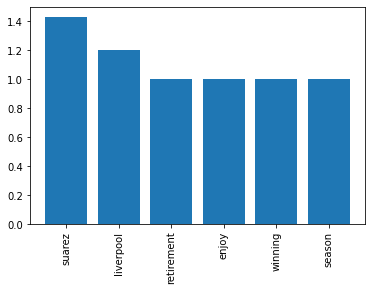

In [123]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    # This line uses the zip function to separate the keys (k) and values (v) from the pair_list.
    
    plt.bar(range(len(k)),v)
    # This line creates a bar chart using Matplotlib's bar function. It plots the values (v) against the indices (using range(len(k))) as bars. 
    
    plt.xticks(range(len(k)),k,rotation='vertical')
   # This sets the x-axis tick labels to the keys (k) using xticks. The rotation='vertical' argument rotates the labels vertically for better readability if the keys are strings.
   
    plt.show()
    #This displays the plot.

plot(res)
#This calls the plot function with res as an argument, assuming res contains the pair_list of data to be plotted.


In [124]:
!{sys.executable} -m pip install wordcloud

'c:\Program' is not recognized as an internal or external command,
operable program or batch file.


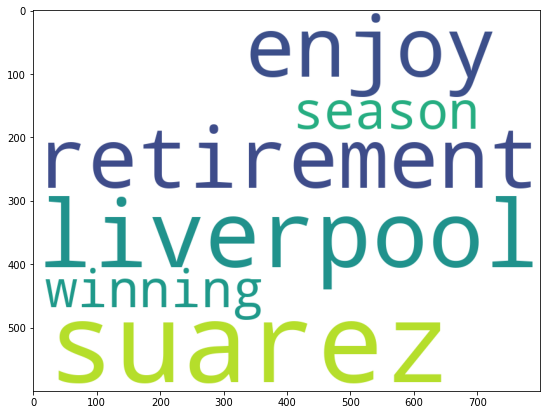

In [125]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
#background_color='white': Sets the background color of the word cloud to white.
#width=800: Specifies the width of the word cloud image.
#height=600: Specifies the height of the word cloud image.
plt.figure(figsize=(15,7))
# The figsize=(15,7) argument sets the width and height of the figure.

plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

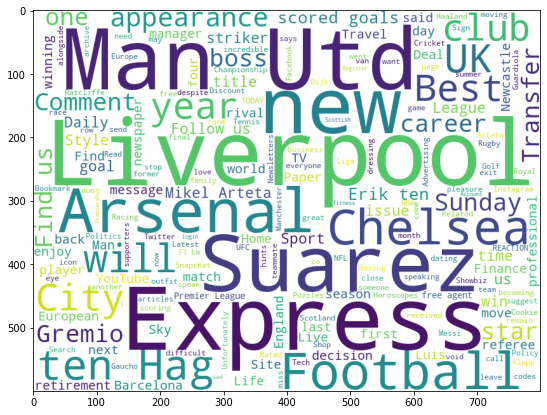

In [126]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [127]:
wc.generate(text).to_file('images/ds_wordcloud.png')